In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import pathlib

sns.set_theme()

green = '#67C478'
purple = '#AAAADD'
blue = '#66CCDD'
orange = '#E89377'

Load Images

In [2]:
data = pd.DataFrame(columns=['mean', 'median'])
img_dir = pathlib.Path('/fsx/raw-data/220926 BC ET/MIP TIFs/')
img_mean = pd.Series()
img_median = pd.Series()

img_names = img_dir.glob('*.tif')
for fname in img_names:
    
    img = io.imread(fname, plugin='pil')
    img_mean[fname.name] = img.mean()
    img_median[fname.name] = np.median(img)

data = pd.DataFrame(zip(img_mean, img_median),
                    columns = ['mean', 'median'],
                    index = img_mean.index)

/tmp/ipykernel_7109/1355732964.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  img_mean = pd.Series()
/tmp/ipykernel_7109/1355732964.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  img_median = pd.Series()


Save results

Reformat to plate format

In [17]:
row_lookup = dict(zip('ABCDEFGH', [0, 1, 2, 3, 4, 5, 6, 7]))
plate = np.zeros((8,12))
for fname in data.index:
    row = row_lookup[fname[13]]
    col = int(fname[14:16]) - 1
    plate[row, col] = data.loc[fname]['mean']
plate = plate - plate[:,10:].mean()
baseline = plate[:,9]
baseline.shape = [baseline.shape[0], 1]
plate = plate / baseline
plate = np.delete(plate, [10, 11], axis=1)

In [ ]:
baseline = plate[:,9]
baseline.shape = [baseline.shape[0], 1]
baseline.shape

Calculate means & plot

<Figure size 720x504 with 0 Axes>

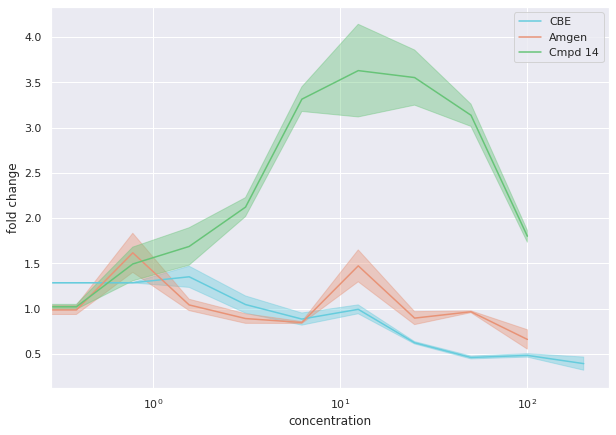

In [9]:
plt.clf()
fig = plt.figure()
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.figsize'] = (10, 7)

conditions = dict(zip(['CBE', 'Amgen', 'Cmpd 14'], [[0,1], [2, 3, 4], [5, 6, 7]]))
# for key, value in conditions.items():
#     plt.plot(np.zeros(plate[value,:].shape(axis=1)))

row_inds = conditions['CBE']
x = [200, 100, 50, 25,12.5,6.25,3.125,1.5625,0.78125, 0]
y = plate[row_inds,:].mean(axis=0)
err = plate[row_inds,:].std(axis=0) / np.sqrt(plate[row_inds,:].shape[0])
plt.fill_between(x, y-err, y+err, color=blue, alpha=0.4, label='_nolegend_')
plt.plot(x, y, color=blue)


row_inds = conditions['Amgen']
x = [100, 50, 25,12.5,6.25,3.125,1.5625,0.78125, 0.390625, 0]
y = plate[row_inds,:].mean(axis=0)
err = plate[row_inds,:].std(axis=0) / np.sqrt(plate[row_inds,:].shape[0])
plt.fill_between(x, y-err, y+err, color=orange, alpha=0.4, label='_nolegend_')
plt.plot(x, y, color=orange)

row_inds = conditions['Cmpd 14']
x = [100, 50, 25,12.5,6.25,3.125,1.5625,0.78125, 0.390625, 0]
y = plate[row_inds,:].mean(axis=0)
err = plate[row_inds,:].std(axis=0) / np.sqrt(plate[row_inds,:].shape[0])
plt.fill_between(x, y-err, y+err, color=green, alpha=0.4, label='_nolegend_')
plt.plot(x, y,  color=green)

ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('concentration')
plt.ylabel('fold change')
plt.legend(conditions.keys())
plt.show()
fig.savefig('/fsx/processed-data/220926 BC ET/2022-10-05_CRC_for_edyta.png')

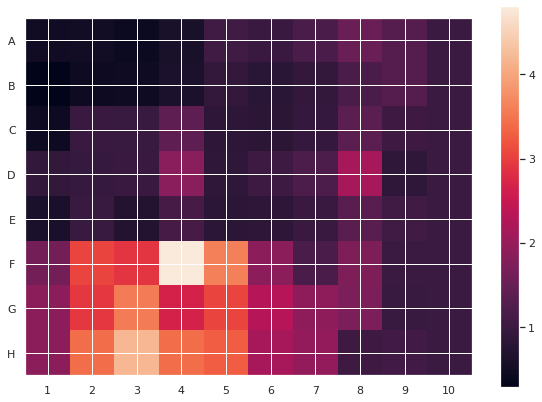

In [53]:
fig = plt.figure()
plt.imshow(plate)
plt.yticks(list(row_lookup.values()), list(row_lookup.keys()))
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.colorbar()
fig.savefig('/fsx/processed-data/220926 BC ET/2022-10-05_platemap_for_edyta.png')

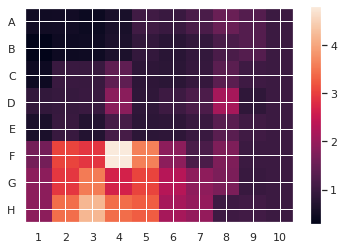

In [4]:
fig = plt.figure()
plt.imshow(plate)
plt.yticks(list(row_lookup.values()), list(row_lookup.keys()))
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.colorbar()

In [18]:
p = pd.DataFrame(plate, index=row_lookup.keys(), columns=np.arange(1,plate.shape[1]+1))

In [19]:
p

,1,2,3,4,5,6,7,8,9,10
A,0.493860,0.508783,0.436560,0.603361,1.060863,0.978580,1.178746,1.516728,1.282294,1.0
B,0.288100,0.455080,0.480952,0.639930,0.921862,0.788600,0.909509,1.185189,1.287763,1.0
C,0.451412,0.987374,0.970949,1.411981,0.852379,0.803518,0.939907,1.357750,1.040621,1.0
D,0.902270,0.945068,0.992189,1.872361,0.863420,1.016847,1.190987,2.145577,0.861390,1.0
E,0.622276,0.960697,0.719014,1.131625,0.819986,0.847648,0.988736,1.345152,1.051826,1.0
F,1.638862,3.053906,2.905419,4.804737,3.616931,1.887596,1.180851,1.741182,1.007428,1.0
G,1.880520,2.927399,3.556277,2.660528,3.041518,2.330931,1.908883,1.700356,0.968718,1.0
H,1.880427,3.430076,4.198922,3.426289,3.286045,2.145559,1.969367,1.036387,1.081757,1.0


In [20]:
p.to_csv('/fsx/processed-data/220926 BC ET/2022-10-06_platemap_bkg_sub_normalized.csv')

In [11]:
row_lookup = dict(zip('ABCDEFGH', [0, 1, 2, 3, 4, 5, 6, 7]))
plate = np.zeros((8,12))
for fname in data.index:
    row = row_lookup[fname[13]]
    col = int(fname[14:16]) - 1
    plate[row, col] = data.loc[fname]['mean']
pd.DataFrame(plate)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1012.735263,1022.266632,976.137246,1082.673471,1374.881608,1322.327395,1450.173723,1666.044008,1516.310344,1336.008332,700.248745,687.014605
1,983.461671,1149.315125,1175.013252,1332.918238,1612.949396,1480.586108,1600.678908,1874.499444,1976.381691,1690.559865,695.693505,690.966841
2,1404.259144,2243.627261,2217.904098,2908.603782,2032.212017,1955.691239,2169.290577,2823.672652,2327.016979,2263.401303,695.972512,694.556950
3,1999.981449,2061.772410,2129.803418,3400.575350,1943.890839,2165.404946,2416.823965,3795.038485,1940.959088,2141.081289,707.032593,693.859284
4,1552.896469,2018.204024,1685.905009,2253.219439,1824.735184,1862.768731,2056.755563,2546.806302,2143.500307,2072.243344,702.584450,697.058823
5,2830.586964,4672.528759,4479.245023,6951.558524,5405.408823,3154.360457,2234.401094,2963.775280,2008.658273,1998.989791,705.000560,698.996725
6,3110.028498,4453.183065,5260.038671,4110.784848,4599.598560,3687.909233,3146.418247,2878.876522,1940.177805,1980.313426,713.358012,695.009081
7,3094.744998,5070.462504,6050.698840,5065.634779,4886.830700,3432.774590,3208.139247,2018.641267,2076.485256,1972.249697,692.849718,686.675514
